# Do not change imports!

In [9]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing, decomposition

import matplotlib.pyplot as plt
%matplotlib inline

# A. Import Data

For this assignment we will use the Iris [dataset](http://archive.ics.uci.edu/ml/datasets/Iris).

In [10]:
# Read the data - directly from the web!
#                 column names are separate, so we add them manually
data = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None,
    names = ['sepal_l_cm', 'sepal_w_cm', 'petal_l_cm', 'petal_w_cm', 'species'],
    sep=',')

# Output the data (notice Pandas will split long files)
data

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
# So as to not fool ourselves, let's split on input data/class label
# In an unsupervised setting, we might not have the class label,
# or use it only for final evaluation
X = data.iloc[:,0:-1]
Y = data.iloc[:, -1]
data = None

In [8]:
# Just to confirm...
X

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# B. Data Exploration via Pandas

In [13]:
# TODO: Use the describe method to output a table of basic stats on all of X's columns
X.describe()

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111e438d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1151a1860>]], dtype=object)

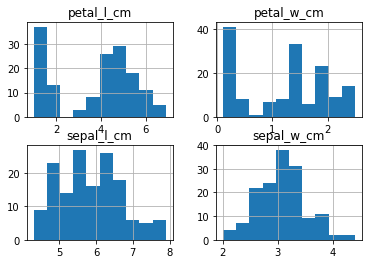

In [15]:
# TODO: Use the hist method to output histograms of all of X's columns
X.hist()

## B.1 Supervised Visualization
While not something we can always do, let's plot each feature with its corresponding species

In [20]:
distinct_species = Y.unique()

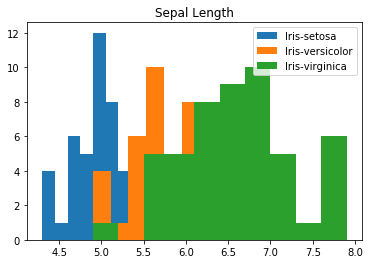

In [23]:
# Y[Y.isin([species])].index prints the list of index that correspond to that distinct species
# i.e. 0~49 for Iris-setosa, 50~99 for Iris-versicolor and 100~149 for Iris-virginica
for species in distinct_species:
    plt.hist([X.loc[p].sepal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Length')
plt.legend(loc='upper right')

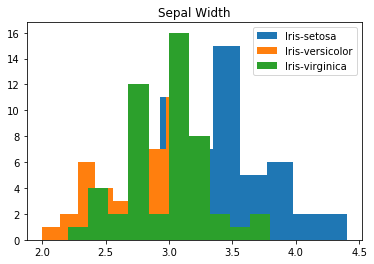

In [26]:
# TODO: repeat for sepal width
for species in distinct_species:
    plt.hist([X.loc[p].sepal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Sepal Width')
plt.legend(loc='upper right')

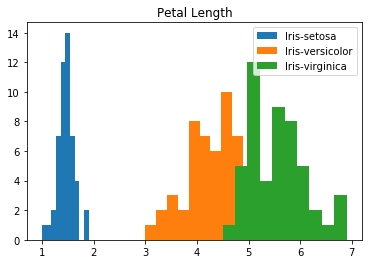

In [27]:
# TODO: repeat for petal length
for species in distinct_species:
    plt.hist([X.loc[p].petal_l_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Length')
plt.legend(loc='upper right')

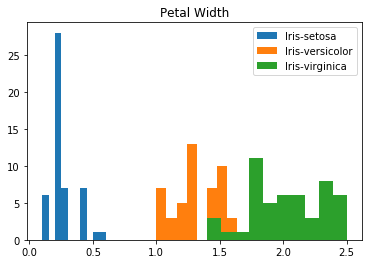

In [28]:
# TODO: repeat for petal width
for species in distinct_species:
    plt.hist([X.loc[p].petal_w_cm for p in Y[Y.isin([species])].index], label=species)

plt.title('Petal Width')
plt.legend(loc='upper right')

TODO: given these visualizations, what conclusion can you draw with respect to the potential for dimensionality reduction

# C. Preprocessing with `scikit-learn`
Before we apply PCA, all features should be normalized such that mean=0, std=0

In [30]:
# TODO: Use the fit_transform function of a preprocessing.StandardScaler to normalize X
#       Replace assignment
scale = preprocessing.StandardScaler()
X_std = scale.fit_transform(X)

In [31]:
# Get the newly standardized data back into a Pandas DataFrame data structure for convenience
X_std = pd.DataFrame(X_std, columns=list(X))

In [32]:
# TODO: use describe to confirm mean/variance has changed
X_std.describe()

,sepal_l_cm,sepal_w_cm,petal_l_cm,petal_w_cm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [ ]:
# TODO: use hist to confirm that the columns have the same relative shapes as before preprocessing

# D. Computing the Covariance Matrix
In order to perform PCA with the eigendecomposition, we will need the covariance matrix

In [ ]:
# TODO: use NumPy's cov function to compute the covariance matrix of X_std
#       NOTE! it expects each row to be all the values of a feature
#             SO... give it the transpose of X_std

But of course we will do this by hand :)

$ \Sigma = \frac{1}{n-1} [ (X - \bar{X})^\intercal(X - \bar{X}) ] $

But remember, we've already subtracted the mean (for `X_std`), so...

$ \Sigma = \frac{1}{n-1} ( X^\intercal X ) $

In [ ]:
# TODO: get n via the shape attribute
n = None

In [ ]:
# TODO: a quick way to perform matrix multiplication is the @ operator
#       NOTE! access the data in the DataFrame via the "values" attribute
X_std_cov = None

# check that your covariance = NumPy above
X_std_cov

TODO: why is this less than an ideal matrix to compute for real datasets?

# E. Eigendecomposition vs SVD

In [ ]:
# TODO: use the eig linear algebra function of NumPy to compute the eigendecomposition
eigvals, eigvecs = (None, None)

print("Values:", eigvals)
print()
print("Vectors:", eigvecs)

In [ ]:
# TODO: use the svd linear algebra function of NumPy to compute the SVD
#       Note! as with cov, use the transpose
svd_u,svd_s,svd_v = (None, None, None)

print("U:", svd_u)
print()
print("S:", svd_s)
print()
print("V:", svd_v)

TODO:
1. Comment on what components of the eigendecomposition correspond to what components of the SVD
2. For each of these, note that the values are not identical - why is this ok with respect to how we use/interpret the results?

# F. Selecting Components
To make the decision about which components to keep, we typically keep those that explain the most variance.

NOTE: the eigenvalues/S should be sorted descending before performing these steps (may already be done)

## F.1 Variance via Eigendecomposition
Explained variance is simply each eigenvalue as a proportion of the sum of the eigenvalues

In [ ]:
prop_eig = [e/sum(eigvals) for e in eigvals]

print(sum(prop_eig))
print(prop_eig)

## F.2 Variance via SVD
Explained variance is each value in S **squared** divided by the sum of all values **squared**:

$$ \frac{s^2}{\sum_i s_i^2} $$

In [ ]:
# TODO: implement for SVD
prop_svd = None

print(sum(prop_svd))
print(prop_svd)

## F.3 Plot Explained Variance

In [ ]:
plt.plot([x+1 for x in range(len(prop_eig))], np.cumsum(prop_eig), '-o')

plt.yticks(np.linspace(0, 1, 11, endpoint=True))
plt.xticks(np.linspace(1, len(prop_eig), len(prop_eig), endpoint=True))
plt.title('Cumulative Explained Variance vs Components')

np.cumsum(prop_eig)

In [ ]:
# TODO: set the following variable to the number of components needed to explain 90% of the variance
numpcs = None

## F.4 PCA via `scikit-learn`
Now that we've done this by hand, notice the easy shortcut :)

In [ ]:
skl_pca = sklearn.decomposition.PCA(n_components=numpcs).fit(X_std)

print("Components:", skl_pca.components_)
print()
print("S:", skl_pca.singular_values_)
print()
print("Explained Variance: ", skl_pca.explained_variance_ratio_)

# G. Visualizing the Projected Data
Now let's project the data into the space defined by our top components (where $W_k$ is the matrix of the $k$ top eigenvectors): $ X_{proj} = X_{std}W_k $

In [ ]:
# TODO: extract the first k eigenvectors
W = None

print("W_{}={}".format(numpcs, W))

In [ ]:
# Dimensions
print(X_std.shape)
print(W.shape)

In [ ]:
# TODO: matrix multiply! (remember @ for shortcut)
X_proj = None

In [ ]:
plt.plot(X_proj[:,0], X_proj[:,1], '.')
plt.xlabel('PC1')
plt.ylabel('PC2')

## G.1 Supervised Visualization
Since we have the actual species, let's overlay this data

In [ ]:
for species in distinct_species:
    plt.plot([X_proj[p, 0] for p in Y[Y.isin([species])].index], [X_proj[p, 1] for p in Y[Y.isin([species])].index], '.', label=species)
    
plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')

# H. Interpretting the Components

In [ ]:
one = pd.Series(eigvecs[:, 0], index=X.columns)
one.sort_values(ascending=False)

In [ ]:
two = pd.Series(eigvecs[:, 1], index=X.columns)
two.sort_values(ascending=False)

TODO: based upon the top two basis vectors, what can we generally say about the relative size of Setosa petals/sepals?